In [1]:
import sys
import os
import pandas as pd
import numpy as np

# Add paths
sys.path.append('../src')
sys.path.append('../experiments')
sys.path.append('../')

# Import modules
from run_experiments import *

In [2]:
# =============================================================================
# 🔐 API Keys Setup - Set your API keys here (optional if already configured)
# =============================================================================

# Set your API keys here (leave empty if already configured in .env or environment)
OPENAI_API_KEY = ''    # Your OpenAI API key
LLAMA_API_KEY = ''     # Your LLaMA API key  
DEEPSEEK_API_KEY = ''  # Your DeepSeek API key

# Apply the keys to environment variables (only if not already set)
import os

# Check and set OpenAI key
if OPENAI_API_KEY:
    os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY
    print("✅ OpenAI API key set from notebook")
elif os.getenv('OPENAI_API_KEY'):
    print("✅ OpenAI API key already configured")
else:
    print("⚠️  OpenAI API key not available")

# Check and set LLaMA key
if LLAMA_API_KEY:
    os.environ['LLAMA_API_KEY'] = LLAMA_API_KEY
    print("✅ LLaMA API key set from notebook")
elif os.getenv('LLAMA_API_KEY'):
    print("✅ LLaMA API key already configured")
else:
    print("⚠️  LLaMA API key not available")

# Check and set DeepSeek key
if DEEPSEEK_API_KEY:
    os.environ['DEEPSEEK_API_KEY'] = DEEPSEEK_API_KEY
    print("✅ DeepSeek API key set from notebook")
elif os.getenv('DEEPSEEK_API_KEY'):
    print("✅ DeepSeek API key already configured")
else:
    print("⚠️  DeepSeek API key not available")

print("\n💡 If all set, you can run experiments with any configured APIs!")

✅ OpenAI API key already configured
✅ LLaMA API key already configured
✅ DeepSeek API key already configured

💡 If all set, you can run experiments with any configured APIs!


### 1.1 Evaluation Against Ground Truth 

In [3]:
print("\n 1.1 Evaluation Against Ground Truth Experiment:")

results = run_experiment_with_custom_data(
    data_path="../data/sample_data/sample_posts_test.csv",
    models=["gpt-4o-mini"],  
    post_id_col="PostId",
    content_col="Body", 
    expert_label_col="Expert_Label",
    prompt_templates=["few_shot_prompt","zero_shot_prompt", "naive_prompt"], 
    verbose=True
)

INFO:run_experiments:Running experiment with gpt-4o-mini using few_shot_prompt



 1.1 Evaluation Against Ground Truth Experiment:
 Loading data from: ../data/sample_data/sample_posts_test.csv
 Loaded 5 posts
 Using columns: PostID='PostId', Content='Body', Label='Expert_Label'
 Label distribution: {'Neutral': 3, 'Positive': 2}

 Running experiment: gpt-4o-mini_few_shot_prompt


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.01it/s]
INFO:run_experiments:Running experiment with gpt-4o-mini using zero_shot_prompt


 Results saved to: ../results/custom_experiments/gpt-4o-mini_few_shot_prompt_predictions.csv
 Accuracy: 1.000, F1: 1.000, Response Rate: 1.000

 Running experiment: gpt-4o-mini_zero_shot_prompt


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.03s/it]
INFO:run_experiments:Running experiment with gpt-4o-mini using naive_prompt


 Results saved to: ../results/custom_experiments/gpt-4o-mini_zero_shot_prompt_predictions.csv
 Accuracy: 1.000, F1: 1.000, Response Rate: 1.000

 Running experiment: gpt-4o-mini_naive_prompt


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.17it/s]

 Results saved to: ../results/custom_experiments/gpt-4o-mini_naive_prompt_predictions.csv
 Accuracy: 1.000, F1: 1.000, Response Rate: 1.000

 Generating comparison summary...
 Comparison summary saved to: ../results/custom_experiments/comparison_summary.csv

 Results Summary:
                  Experiment  Accuracy  F1_Macro  Response_Rate
 gpt-4o-mini_few_shot_prompt       1.0       1.0            1.0
gpt-4o-mini_zero_shot_prompt       1.0       1.0            1.0
    gpt-4o-mini_naive_prompt       1.0       1.0            1.0

 Experiment completed! Results saved to: ../results/custom_experiments/


### 1.2 Pure Prediction Mode (No ground truth needed)

In [4]:
print("\n Pure Prediction Mode:")

# Original prediction function unchanged
prediction_results = predict_sentiment_batch(
    data_path="../data/sample_data/sample_posts_test.csv",
    models=["gpt-4o-mini", "deepseek-chat"],
    post_id_col="PostId",
    content_col="Body",
    verbose=True
)


 Pure Prediction Mode:
 Loading data from: ../data/sample_data/sample_posts_test.csv
 Loaded 5 posts for prediction
 Using columns: PostID='PostId', Content='Body'
 Predicting sentiment using prompt: few_shot_prompt

 Predicting with gpt-4o-mini...


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.29it/s]


 gpt-4o-mini: 5/5 predictions (100.0% success rate)
 Distribution: {'Neutral': 3, 'Positive': 2}

 Predicting with deepseek-chat...


Processing posts with deepseek-chat: 100%|███████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]

 deepseek-chat: 5/5 predictions (100.0% success rate)
 Distribution: {'Neutral': 3, 'Positive': 2}

 Predictions saved to: ../results/predictions/sentiment_predictions_20250731_174002.csv
 Results summary:
   - Total posts: 5
   - Models used: ['gpt-4o-mini', 'deepseek-chat']
   - New columns: ['Predicted_gpt-4o-mini', 'Predicted_deepseek-chat']


In [5]:
# Display sample results
print("\n Sample Prediction Results:")
sample_cols = ['PostId', 'Body', 'Predicted_gpt-4o-mini', 'Predicted_deepseek-chat']
for _, row in prediction_results[sample_cols].head(3).iterrows():
    print(f"🆔 {row['PostId']}:")
    print(f"   GPT-4o-mini: {row['Predicted_gpt-4o-mini']}")
    print(f"   deepseek-chat: {row['Predicted_deepseek-chat']}")
    print(f"📝 {row['Body'][:80]}...")
    print()

# Create sentiment mapping for analysis
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
prediction_results['Sentiment_GPT_4o_mini'] = prediction_results['Predicted_gpt-4o-mini'].map(sentiment_map)
prediction_results['Sentiment_deepseek-chat'] = prediction_results['Predicted_deepseek-chat'].map(sentiment_map)

print(f" Sentiment distribution:")
print("GPT-4o-mini:")
print(prediction_results['Predicted_gpt-4o-mini'].value_counts())
print("\ndeepseek-chat:")
print(prediction_results['Predicted_deepseek-chat'].value_counts())


 Sample Prediction Results:
🆔 POST_001:
   GPT-4o-mini: Positive
   deepseek-chat: Positive
📝 I thought I'd need help last night, but I managed to calm my breathing down....

🆔 POST_018:
   GPT-4o-mini: Neutral
   deepseek-chat: Neutral
📝 The research shows mixed results for this treatment approach....

🆔 POST_016:
   GPT-4o-mini: Neutral
   deepseek-chat: Neutral
📝 Has anyone tried the new inhaler device? Wondering about side effects....

 Sentiment distribution:
GPT-4o-mini:
Predicted_gpt-4o-mini
Neutral     3
Positive    2
Name: count, dtype: int64

deepseek-chat:
Predicted_deepseek-chat
Neutral     3
Positive    2
Name: count, dtype: int64


### 2.1 Evaluation Against Ground Truth with Confidence

In [6]:
# Using new confidence functionality
confidence_results = run_experiment_with_confidence(
    data_path="../data/sample_data/sample_posts_test.csv",
    models=["gpt-4o-mini"],
    post_id_col="PostId",
    content_col="Body",
    expert_label_col="Expert_Label",
    prompt_templates=["zero_shot", "naive"],  # base template names
    verbose=True
)

INFO:run_experiments:Running confidence experiment with gpt-4o-mini using zero_shot


 Loading data from: ../data/sample_data/sample_posts_test.csv
 Loaded 5 posts

 Running confidence experiment: gpt-4o-mini_zero_shot_confidence


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.67it/s]
INFO:run_experiments:Running confidence experiment with gpt-4o-mini using naive


 Results saved to: results/confidence_experiments/gpt-4o-mini_zero_shot_confidence_predictions.csv
 Accuracy: 1.000, Mean Confidence: 0.760

 Running confidence experiment: gpt-4o-mini_naive_confidence


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]

 Results saved to: results/confidence_experiments/gpt-4o-mini_naive_confidence_predictions.csv
 Accuracy: 1.000, Mean Confidence: 0.740


### 2.2 Pure Prediction Mode - with Confidence

In [7]:
confidence_prediction_results = predict_sentiment_batch_with_confidence(
    data_path="../data/sample_data/sample_posts_test.csv",
    models=["gpt-4o-mini"],
    post_id_col="PostId",
    content_col="Body",
    prompt_template="naive",
    verbose=True
)

print(" Confidence prediction completed")
print(f" Prediction result shape: {confidence_prediction_results.shape}")

# Display sample results
print("\n Sample Results:")
display_cols = ['PostId', 'Predicted_gpt-4o-mini', 'Confidence_gpt-4o-mini']
for _, row in confidence_prediction_results[display_cols].head(3).iterrows():
    print(f" {row['PostId']}: {row['Predicted_gpt-4o-mini']} (conf: {row['Confidence_gpt-4o-mini']:.3f})")



INFO:run_experiments:Running confidence experiment with gpt-4o-mini using naive


 Loading data from: ../data/sample_data/sample_posts_test.csv
 Loaded 5 posts for confidence prediction
 Using columns: PostID='PostId', Content='Body'
 Predicting sentiment with confidence using template: naive

 Predicting with confidence using gpt-4o-mini...


Processing posts with gpt-4o-mini: 100%|█████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.67it/s]

 gpt-4o-mini: 5/5 predictions (100.0% success rate)
 Mean confidence: 0.740
 Distribution: {'Neutral': 3, 'Positive': 2}

 Confidence predictions saved to: ../results/predictions/confidence_predictions_20250731_174031.csv
 Results summary:
   - Total posts: 5
   - Models used: ['gpt-4o-mini']
   - New columns: ['Predicted_gpt-4o-mini', 'Confidence_gpt-4o-mini']
 Confidence prediction completed
 Prediction result shape: (5, 6)

 Sample Results:
 POST_001: Positive (conf: 0.800)
 POST_018: Neutral (conf: 0.700)
 POST_016: Neutral (conf: 0.700)


In [8]:
# Create sentiment mapping for analysis
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
confidence_prediction_results['Sentiment_GPT_4o_mini'] = confidence_prediction_results['Predicted_gpt-4o-mini'].map(sentiment_map)

In [9]:
confidence_prediction_results

,PostId,Body,Expert_Label,Category,Predicted_gpt-4o-mini,Confidence_gpt-4o-mini,Sentiment_GPT_4o_mini
0,POST_001,"I thought I'd need help last night, but I mana...",Positive,Health Improvement,Positive,0.8,1
1,POST_018,The research shows mixed results for this trea...,Neutral,Generated,Neutral,0.7,0
2,POST_016,Has anyone tried the new inhaler device? Wonde...,Neutral,Generated,Neutral,0.7,0
3,POST_002,There was a fuss about the drug about ten year...,Neutral,Uncertainty,Neutral,0.6,0
4,POST_009,The new inhaler technique really helped me dur...,Positive,Generated,Positive,0.9,1


### 3 Confidence Calibration Analysis (prepare a full data containing all predictions before starting)

In [10]:
# Setup and Imports
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from src.scripts.confidence_analysis import ConfidenceAnalysisRunner

INFO:src.scripts.confidence_analysis:Loading and transforming data...
INFO:src.scripts.confidence_analysis:Loaded 200 posts from ..\data\sample_data\example_data_no_text.csv
INFO:src.scripts.confidence_analysis:Detected numeric sentiment column: Sentiment_Majority with values [-1, 0, 1]
INFO:src.scripts.confidence_analysis:Mapped column Sentiment_Majority: {1: 'Positive', -1: 'Negative', 0: 'Neutral'}
INFO:src.scripts.confidence_analysis:True sentiment distribution: {'Positive': 105, 'Negative': 54, 'Neutral': 41}
INFO:src.scripts.confidence_analysis:Extracted model configurations: [('gpt-4.1', 'few_shot'), ('gpt-4.1-mini', 'naive'), ('o3', 'few_shot'), ('o3-mini', 'zero_shot'), ('gpt-4.1-mini', 'few_shot'), ('gpt-4.1', 'zero_shot'), ('o3', 'zero_shot'), ('o3-mini', 'naive'), ('o3', 'naive'), ('gpt-4.1-mini', 'zero_shot'), ('gpt-4.1', 'naive'), ('o3-mini', 'few_shot')]
INFO:src.scripts.confidence_analysis:Found 12 model configurations
INFO:src.scripts.confidence_analysis:Transformed to

 Total experiments to visualize: 6
   - o3 + zero-shot
   - o3 + few-shot
   - o3 + naive
   - o3-mini + zero-shot
   - o3-mini + few-shot
   - o3-mini + naive

 Creating calibration plots for all 6 experiments...
 Successfully plotted: 6/6 experiments


INFO:src.scripts.confidence_analysis:Plot saved to ..\results\confidence_analysis_custom\calibration_plots.png


 Results saved to: ../results/confidence_analysis_custom


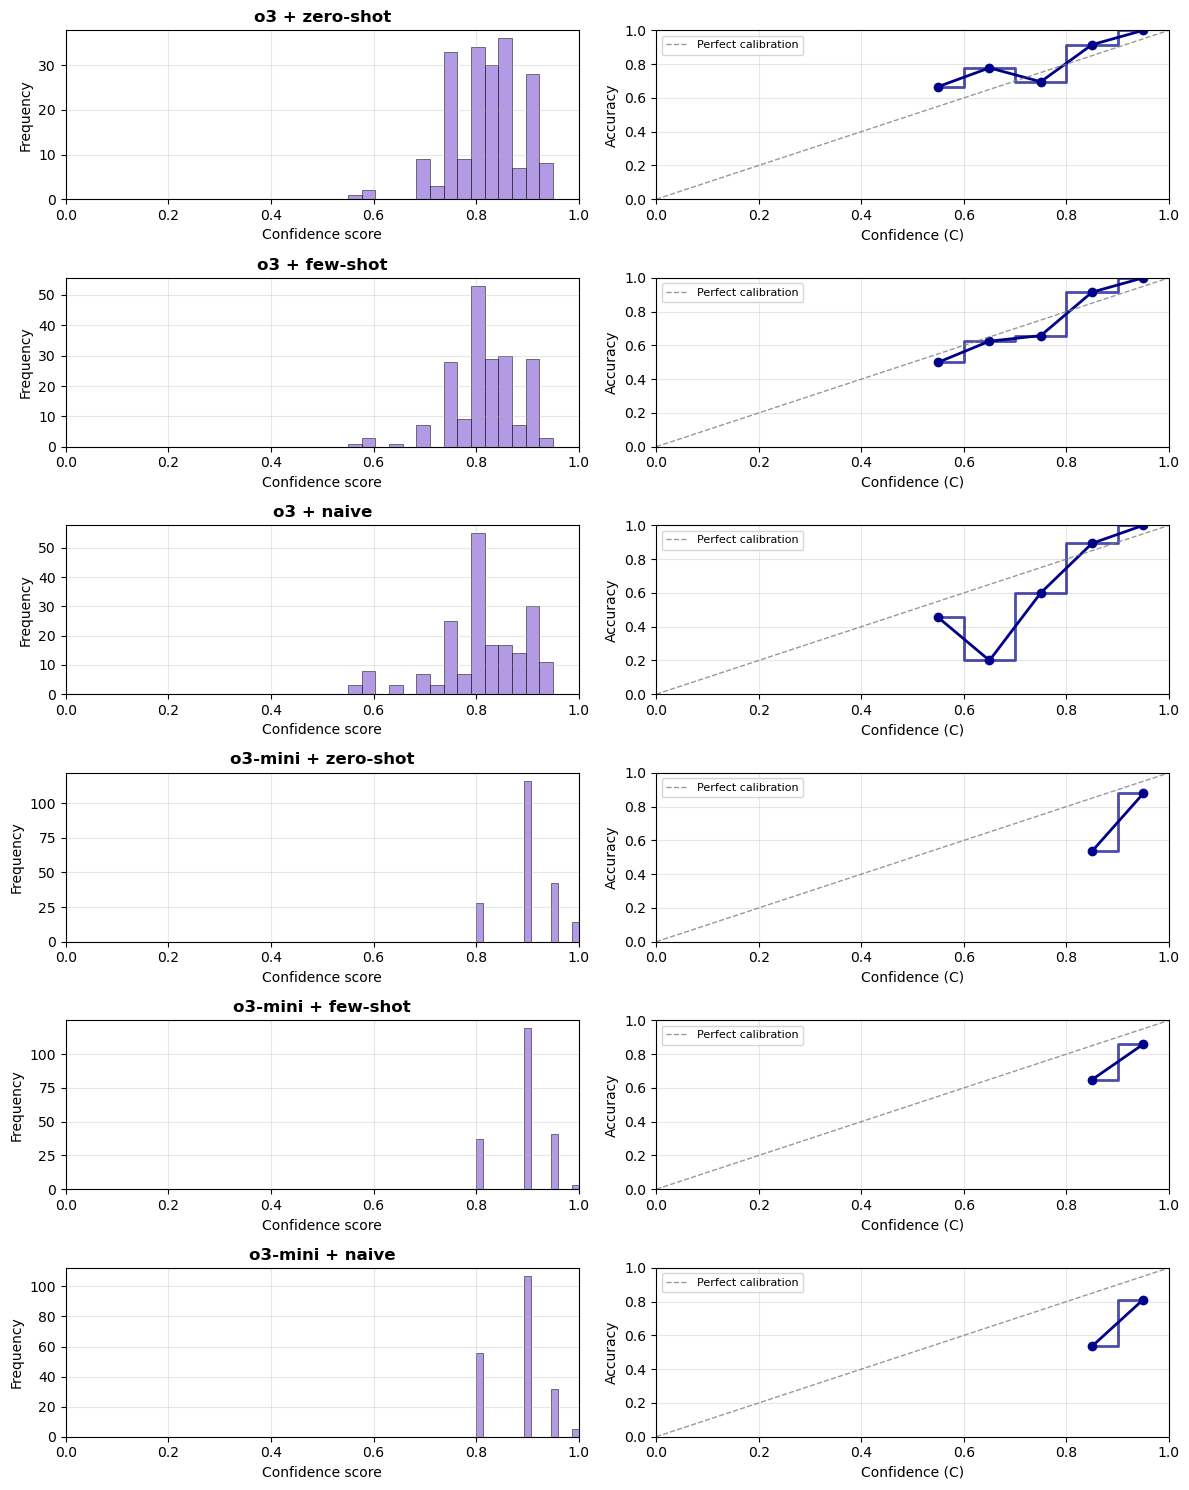

In [11]:
custom_runner = ConfidenceAnalysisRunner(
    data_path="../data/sample_data/example_data_no_text.csv", # use provided data as example
    sentiment_mapping={-1: 'Negative', 0: 'Neutral', 1: 'Positive'},  # Adjust as needed
    true_label_col="Sentiment_Majority"  # Adjust column name
)

# Run with custom model and prompt selection
custom_results = custom_runner.run_calibration_visualization(
    models_to_test=["o3", "o3-mini"],  # Add more models like "gpt-4.1", "gpt-4.1-mini"
    prompt_templates=["zero_shot", "few_shot","naive"],  # Focus on specific prompts
    output_dir="../results/confidence_analysis_custom"
)